# *Monod* demonstration: fit to neural cell subtypes

In the current notebook, we run the *Monod* inference pipeline on eight pre-clustered mouse brain cell datasets, disaggregated into GABAergic and glutamatergic cell types, using a common set of 3,000 genes, a $20\times 21$ grid, and four models (bursty, constitutive, extrinsic, and CIR-like).

## Metadata and prerequisites

Define the dataset metadata and disk locations.

In [1]:
from preprocess import *
from extract_data import extract_data
import cme_toolbox
from cme_toolbox import CMEModel
import inference
from inference import InferenceParameters, GradientInference
import analysis 
from analysis import *

We already know the sampling parameters for glutamatergic cells. Instead of scanning over a grid, just pull them in from previous search results.

In [2]:
dataset_meta = ['A08', 'B01','B08','C01']

cluster_names = ['l5it','l6it','l6ct']
dataset_names = ['allen_'+x+'_'+y for x in dataset_meta for y in cluster_names] 
loom_filepaths = ['/home/ggorin/count_data/loom_allen_celltype_kb/test/'+x+'.loom' for x in dataset_names] 

transcriptome_filepath = './polyA_ref/gg_200524_mouse_genome_polyA_cum_1'
attribute_names=['spliced','unspliced','gene_name','barcode']

n_datasets = len(loom_filepaths)


In [6]:
# result_strings

In [ ]:
# dir_string_prev = './fits/gg_220527_021_allen_celltypes_1'
# result_strings = [dir_string_prev+'/allen_'+x+'_glu/Bursty_Poisson_20x21/grid_scan_results_upd.res' for x in dataset_meta]

# so_ = []
# for j in range(len(result_strings)):
#     sr = load_search_results(result_strings[j])
#     so_.append(sr.samp_optimum)


In [36]:
so_

[(-6.2631578947368425, -0.8999999999999999),
 (-6.2631578947368425, -0.8999999999999999),
 (-6.2631578947368425, -1.05),
 (-6.2631578947368425, -0.8999999999999999)]

In [43]:
so = np.zeros((n_datasets,2))
for i in range(n_datasets):
    so[i] = so_[i//len(cluster_names)]

In [44]:
so

array([[-6.26315789, -0.9       ],
       [-6.26315789, -0.9       ],
       [-6.26315789, -0.9       ],
       [-6.26315789, -0.9       ],
       [-6.26315789, -0.9       ],
       [-6.26315789, -0.9       ],
       [-6.26315789, -1.05      ],
       [-6.26315789, -1.05      ],
       [-6.26315789, -1.05      ],
       [-6.26315789, -0.9       ],
       [-6.26315789, -0.9       ],
       [-6.26315789, -0.9       ]])

## Preprocessing

Identify the genes to fit.

Construct a batch by finding 3,000 genes which have at least moderate expression across all datasets. Visualize the set of genes (purple) that meet the expression filtering criteria.

INFO:root:Beginning data preprocessing and filtering.
INFO:root:Directory ./fits/gg_220601_022_allen_cellsubtypes_1 created.
INFO:root:Dataset: allen_A08_l5it
INFO:root:3140 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:7443 genes retained after expression filter.
INFO:root:Directory ./fits/gg_220601_022_allen_cellsubtypes_1/allen_A08_l5it created.
INFO:root:Dataset: allen_A08_l6it
INFO:root:199 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:4900 genes retained after expression filter.
INFO:root:Directory ./fits/gg_220601_022_allen_cellsubtypes_1/allen_A08_l6it created.
INFO:root:Dataset: allen_A08_l6ct
INFO:root:1305 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:6566 genes retained after expression filter.
INFO:root:Directory ./fits/gg_220601_022_allen_cellsubtypes_1/allen_A08_l6ct created.


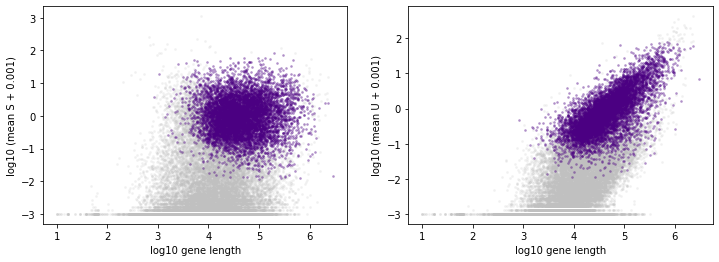

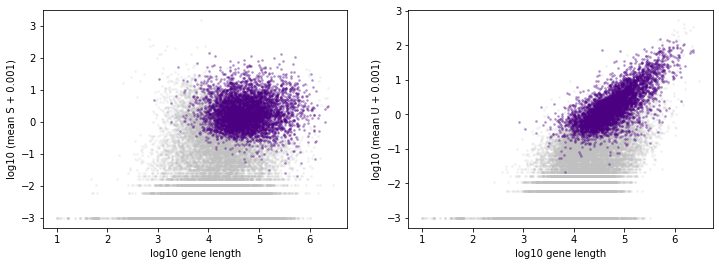

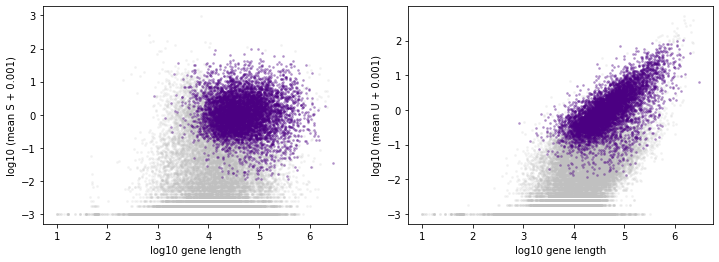

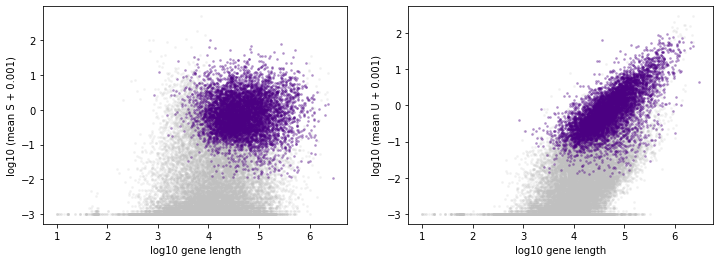

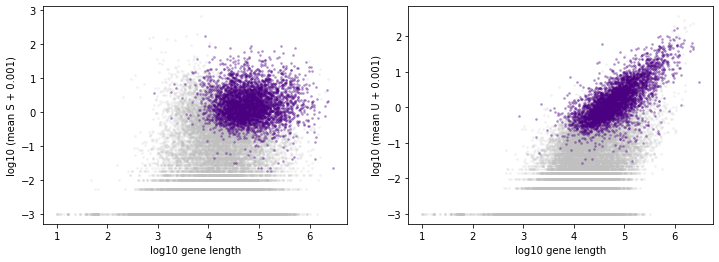

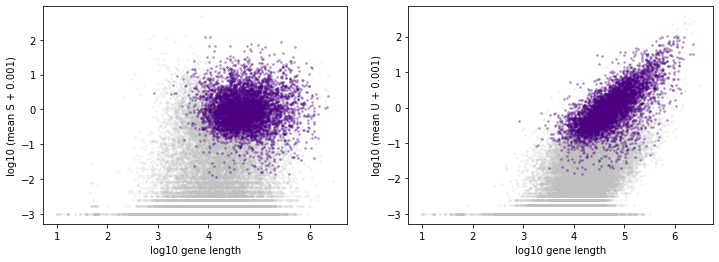

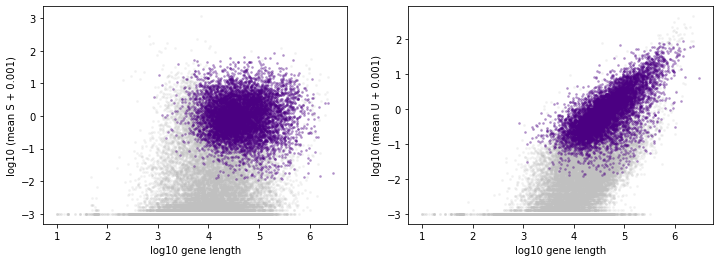

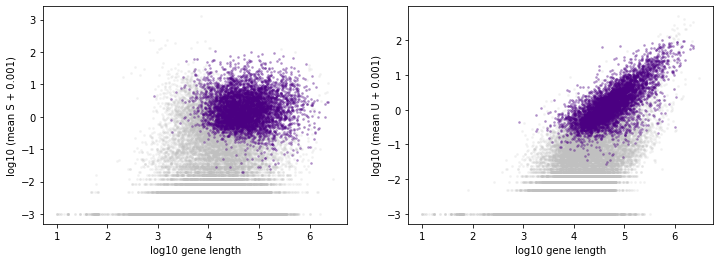

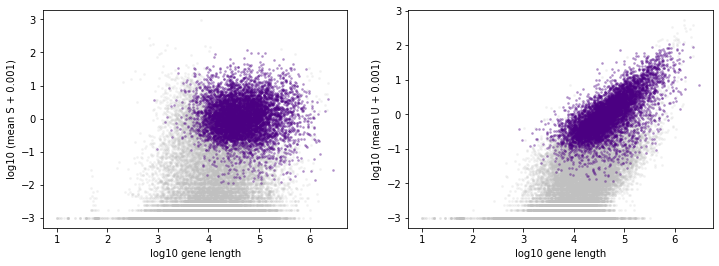

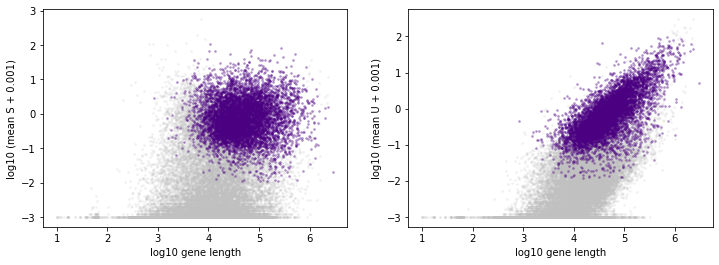

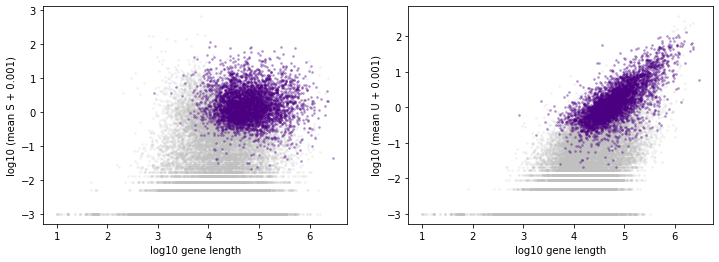

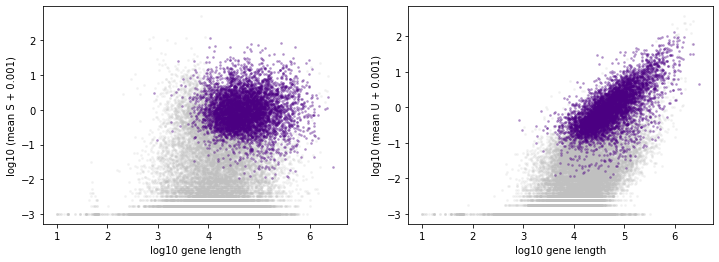

In [11]:
dir_string,dataset_strings = construct_batch(loom_filepaths, \
                                             transcriptome_filepath, \
                                             dataset_names, \
                                             attribute_names=attribute_names,\
                                             batch_location='./fits',meta='allen_cellsubtypes',batch_id=1,\
                                             n_genes=3000)

## Inference

Define parameter bounds, then iterate over datasets and perform the fits.

INFO:root:Global inference parameters stored to ./fits/gg_220601_022_allen_cellsubtypes_1/allen_A08_l5it/Bursty_Poisson_1x1/parameters.pr.
INFO:root:Beginning data extraction.
INFO:root:Dataset: allen_A08_l5it
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:Gene list extracted from ./fits/gg_220601_022_allen_cellsubtypes_1/genes.csv.
INFO:root:Search data stored to ./fits/gg_220601_022_allen_cellsubtypes_1/allen_A08_l5it/raw.sd.
INFO:root:Starting non-parallelized grid scan.
INFO:root:Non-parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Runtime: 178.4 seconds.
INFO:root:Global inference parameters stored to ./fits/gg_220601_022_allen_cellsubtypes_1/allen_A08_l6it/Bursty_Poisson_1x1/parameters.pr.
INFO:root:Beginning data extraction.
INFO:root:Dataset: allen_A08_l6it
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:Gene list extracted from ./fits/gg_2

INFO:root:Beginning data extraction.
INFO:root:Dataset: allen_B08_l6ct
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:Gene list extracted from ./fits/gg_220601_022_allen_cellsubtypes_1/genes.csv.
INFO:root:Directory ./fits/gg_220601_022_allen_cellsubtypes_1/allen_B08_l6ct/diagnostic_figures created.
INFO:root:Search data stored to ./fits/gg_220601_022_allen_cellsubtypes_1/allen_B08_l6ct/raw.sd.
INFO:root:Starting non-parallelized grid scan.
INFO:root:Non-parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Directory ./fits/gg_220601_022_allen_cellsubtypes_1/allen_B08_l6ct/Bursty_Poisson_1x1/analysis_figures created.
INFO:root:Runtime: 147.0 seconds.
INFO:root:Directory ./fits/gg_220601_022_allen_cellsubtypes_1/allen_C01_l5it/Bursty_Poisson_1x1 created.
INFO:root:Global inference parameters stored to ./fits/gg_220601_022_allen_cellsubtypes_1/allen_C01_l5it/Bursty_Poisson_1x1/parameters.pr.
INFO:root:

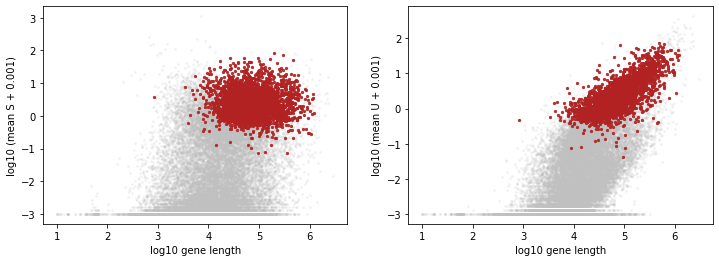

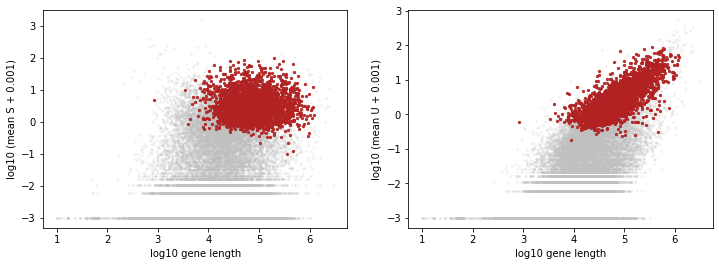

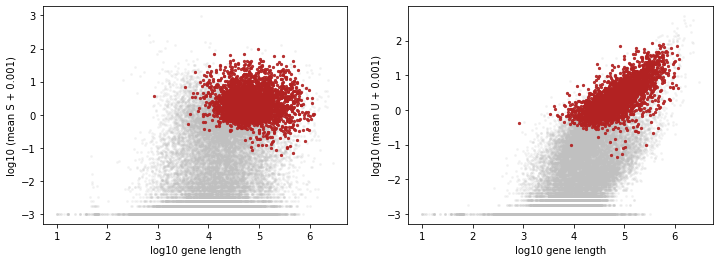

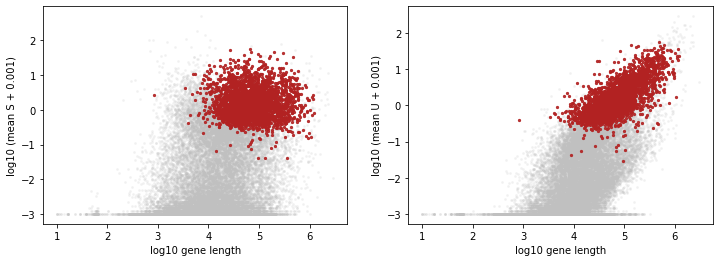

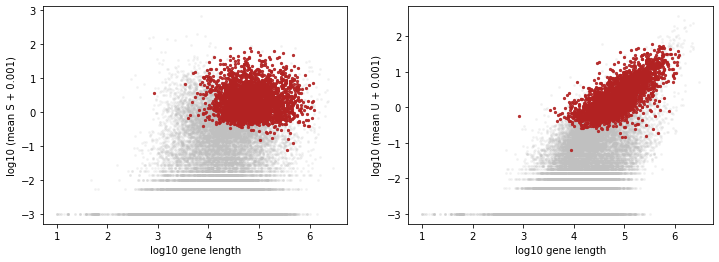

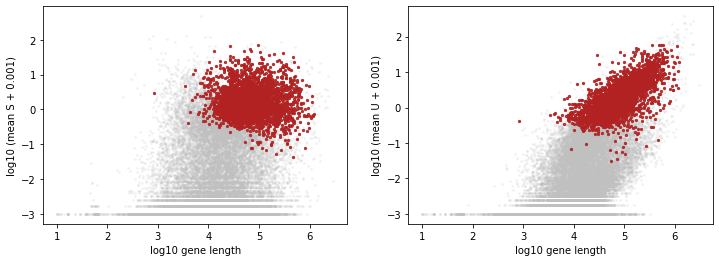

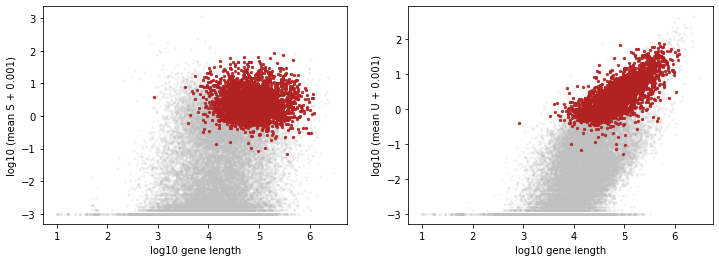

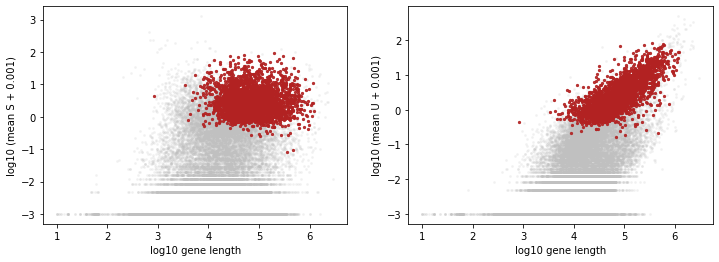

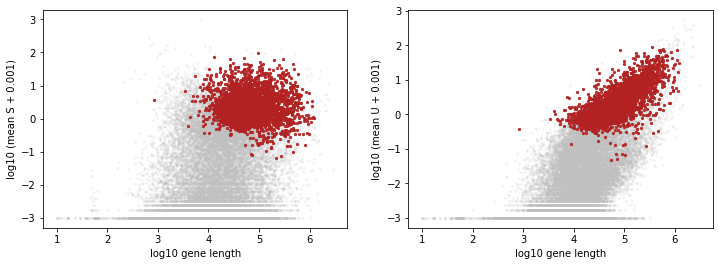

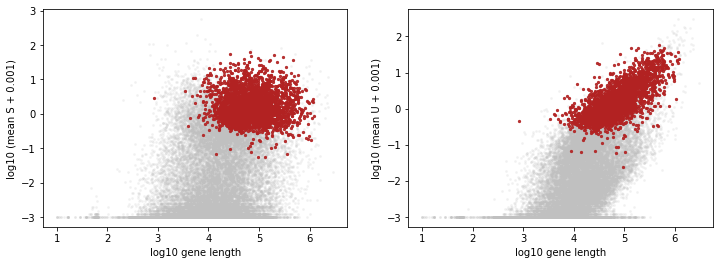

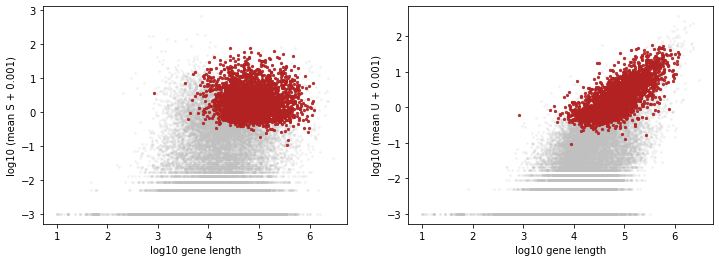

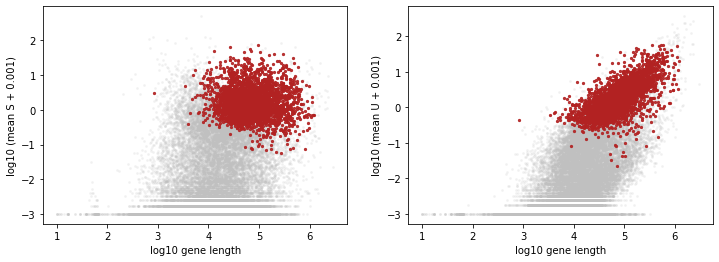

In [46]:
lb = [-1.0, -1.8, -1.8 ]
ub = [4.2, 2.5, 3.5]
grid = [1,1]



result_strings = []
for i in range(n_datasets):
    fitmodel = CMEModel('Bursty','Poisson')
    inference_parameters = InferenceParameters(lb,ub,so[i],so[i],grid,\
                dataset_strings[i],fitmodel,use_lengths = True,
                gradient_params = {'max_iterations':10,'init_pattern':'moments','num_restarts':1})
    search_data = extract_data(loom_filepaths[i], transcriptome_filepath, dataset_names[i],
                dataset_strings[i], dir_string, dataset_attr_names=attribute_names)
    full_result_string = inference_parameters.fit_all_grid_points(1,search_data)
    result_strings.append(full_result_string)

In [3]:
dataset_strings = ['./fits/gg_220601_022_allen_cellsubtypes_1/'+x for x in dataset_names]

In [4]:
sd_strings = [x+'/raw.sd' for x in dataset_strings]

In [5]:
Degas=("#591d06", "#96410e", "#e5a335", "#556219", "#418979", "#2b614e", "#053c29")
Demuth = ("#591c19", "#9b332b", "#b64f32", "#d39a2d", "#f7c267", "#b9b9b8", "#8b8b99", "#5d6174", "#41485f", "#262d42")


In [6]:
result_strings  = ['./fits/gg_220601_022_allen_cellsubtypes_1/allen_A08_l5it/Bursty_Poisson_1x1/grid_scan_results.res',
 './fits/gg_220601_022_allen_cellsubtypes_1/allen_A08_l6it/Bursty_Poisson_1x1/grid_scan_results.res',
 './fits/gg_220601_022_allen_cellsubtypes_1/allen_A08_l6ct/Bursty_Poisson_1x1/grid_scan_results.res',
 './fits/gg_220601_022_allen_cellsubtypes_1/allen_B01_l5it/Bursty_Poisson_1x1/grid_scan_results.res',
 './fits/gg_220601_022_allen_cellsubtypes_1/allen_B01_l6it/Bursty_Poisson_1x1/grid_scan_results.res',
 './fits/gg_220601_022_allen_cellsubtypes_1/allen_B01_l6ct/Bursty_Poisson_1x1/grid_scan_results.res',
 './fits/gg_220601_022_allen_cellsubtypes_1/allen_B08_l5it/Bursty_Poisson_1x1/grid_scan_results.res',
 './fits/gg_220601_022_allen_cellsubtypes_1/allen_B08_l6it/Bursty_Poisson_1x1/grid_scan_results.res',
 './fits/gg_220601_022_allen_cellsubtypes_1/allen_B08_l6ct/Bursty_Poisson_1x1/grid_scan_results.res',
 './fits/gg_220601_022_allen_cellsubtypes_1/allen_C01_l5it/Bursty_Poisson_1x1/grid_scan_results.res',
 './fits/gg_220601_022_allen_cellsubtypes_1/allen_C01_l6it/Bursty_Poisson_1x1/grid_scan_results.res',
 './fits/gg_220601_022_allen_cellsubtypes_1/allen_C01_l6ct/Bursty_Poisson_1x1/grid_scan_results.res']

In [7]:
sr_arr = []
sd_arr = []


for j in range(n_datasets):
    sd = load_search_data(sd_strings[j])
    sr = load_search_results(result_strings[j])
    
    sd_arr.append(sd)
    sr_arr.append(sr)


INFO:root:Search data loaded from ./fits/gg_220601_022_allen_cellsubtypes_1/allen_A08_l5it/raw.sd.
INFO:root:Grid scan results loaded from ./fits/gg_220601_022_allen_cellsubtypes_1/allen_A08_l5it/Bursty_Poisson_1x1/grid_scan_results.res.
INFO:root:Search data loaded from ./fits/gg_220601_022_allen_cellsubtypes_1/allen_A08_l6it/raw.sd.
INFO:root:Grid scan results loaded from ./fits/gg_220601_022_allen_cellsubtypes_1/allen_A08_l6it/Bursty_Poisson_1x1/grid_scan_results.res.
INFO:root:Search data loaded from ./fits/gg_220601_022_allen_cellsubtypes_1/allen_A08_l6ct/raw.sd.
INFO:root:Grid scan results loaded from ./fits/gg_220601_022_allen_cellsubtypes_1/allen_A08_l6ct/Bursty_Poisson_1x1/grid_scan_results.res.
INFO:root:Search data loaded from ./fits/gg_220601_022_allen_cellsubtypes_1/allen_B01_l5it/raw.sd.
INFO:root:Grid scan results loaded from ./fits/gg_220601_022_allen_cellsubtypes_1/allen_B01_l5it/Bursty_Poisson_1x1/grid_scan_results.res.
INFO:root:Search data loaded from ./fits/gg_2206

In [8]:
dir_string = './fits/gg_220601_022_allen_cellsubtypes_1'

In [9]:
make_batch_analysis_dir(sr_arr,dir_string)

In [10]:
#a e s t h e t i c s

fs = 16
nbin=40

#https://github.com/BlakeRMills/MetBrewer
Degas=("#591d06", "#96410e", "#e5a335", "#556219", "#418979", "#2b614e", "#053c29")
Demuth = ("#591c19", "#9b332b", "#b64f32", "#d39a2d", "#f7c267", "#b9b9b8", "#8b8b99", "#5d6174", "#41485f", "#262d42")


In [17]:
# sz=(3,4)
# fig1,ax1 = plt.subplots(sz[0],sz[1],figsize=(15,9))
thr = [3e3, 7e3, 4e3, 3e3, 
       7e3, 5e3, 4e3, 8e3,
       5e3, 3e3, 7e3, 5e3]
# for j in range(n_datasets):
#     axloc=np.unravel_index(j,sz)
#     sd_arr[j].knee_plot(ax1=ax1[axloc],viz=True,thr=thr[j])
#     ax1[axloc].set_title(dataset_names[j])
# fig1.tight_layout()


# analysis_dir_string = sr_arr[0].batch_analysis_string
# fig_string = analysis_dir_string+'/kneeplots_all.png'
# plt.savefig(fig_string,dpi=450)
# log.info('Figure stored to {}.'.format(fig_string))


In [12]:
from scipy import stats

In [13]:
ss.shape

NameError: name 'ss' is not defined

In [ ]:
sd_arr[0].S.shape

In [14]:
dataset_names

['allen_A08_l5it',
 'allen_A08_l6it',
 'allen_A08_l6ct',
 'allen_B01_l5it',
 'allen_B01_l6it',
 'allen_B01_l6ct',
 'allen_B08_l5it',
 'allen_B08_l6it',
 'allen_B08_l6ct',
 'allen_C01_l5it',
 'allen_C01_l6it',
 'allen_C01_l6ct']

allen_A08_l5it
3140
3090
allen_A08_l6it
199
199
allen_A08_l6ct
1305
1296
allen_B01_l5it
4293
4236
allen_B01_l6it
229
227
allen_B01_l6ct
1367
1337
allen_B08_l5it
3243
3189
allen_B08_l6it
266
260
allen_B08_l6ct
1398
1382
allen_C01_l5it
4393
4285
allen_C01_l6it
254
249
allen_C01_l6ct
1375
1340


KeyboardInterrupt: 

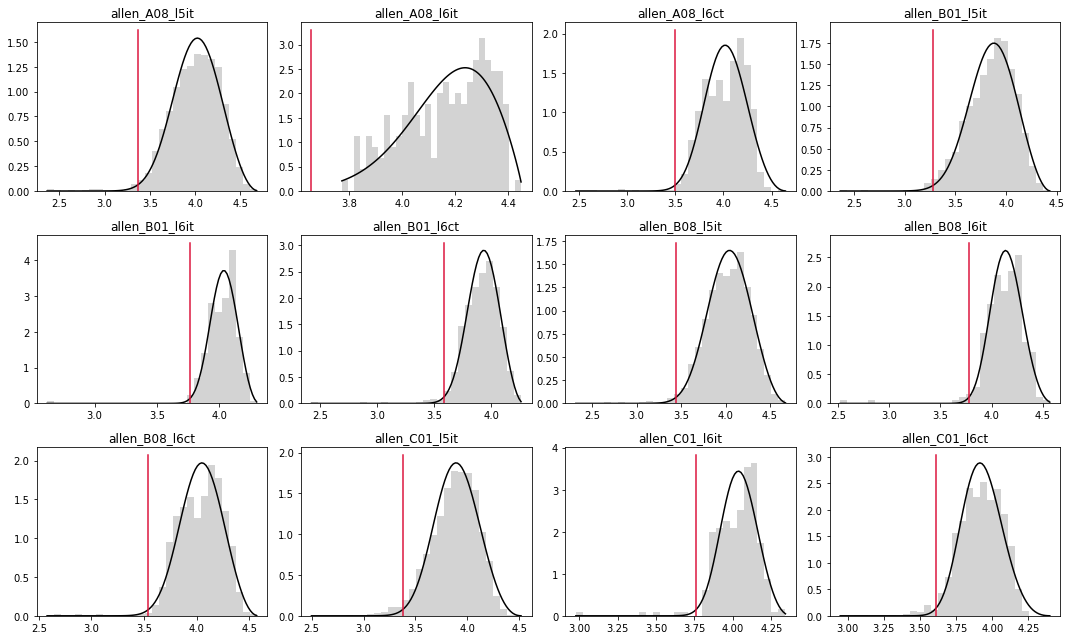

Error in callback <function flush_figures at 0x7f59bd43cf70> (for post_execute):


KeyboardInterrupt: 

In [16]:
sz=(3,4)
fig1,ax1 = plt.subplots(sz[0],sz[1],figsize=(15,9))
fig2,ax2 = plt.subplots(sz[0],sz[1],figsize=(15,9))
for j in range(n_datasets):
    print(dataset_names[j])
    axloc=np.unravel_index(j,sz)
    
    ss = np.log10(sd_arr[j].S.sum(0)+1)
    fitlaw = scipy.stats.genextreme

    cf = np.ones(len(ss),dtype=bool)
    for _ in range(10):
        fitparams = fitlaw.fit(ss[cf])
        ppf = fitlaw.ppf([0.005,0.995],*fitparams)
        cf = (ss>ppf[0]) #& (ss<ppf[1])
    x = np.linspace(ss.min(),ss.max(),100)
    ax1[axloc].hist(ss,30,density=True,color='lightgray')
    p = fitlaw.pdf(x, *fitparams)
    ax1[axloc].plot(x,p,'k-')
    
    x=[ppf[0]]*2
    yl = ax1[axloc].get_ylim()
    ax1[axloc].plot(x,yl,'-',color='crimson')
    
    
    sd_arr[j].knee_plot(ax1=ax2[axloc],viz=True,thr=10**ppf[0])
    ax1[axloc].set_title(dataset_names[j])
    ax2[axloc].set_title(dataset_names[j])
    
    print(len(cf))
    print(cf.sum())
fig1.tight_layout()
fig2.tight_layout()

In [ ]:
cf.sum()

3140

In [169]:
thr

[3000.0,
 7000.0,
 4000.0,
 3000.0,
 7000.0,
 5000.0,
 4000.0,
 8000.0,
 5000.0,
 3000.0,
 7000.0,
 5000.0]

In [176]:
S_[0].shape

(3000, 3140)

In [244]:
def get_noise_decomp_(S_,sizefactor = 'pf',lognormalize=True,pcount=0,knee_thr=None):
    """
    This method performs normalization and variance stabilization on the raw data, and
    reports the fractions of normalized variance retained and removed as a result of the process.

    Input:
    sizefactor: what size factor to use. 
        'pf': Proportional fitting; set the size of each cell to the mean size.
        a number: use this number (e.g., 1e4 for cp10k).
        None: do not do size/depth normalization.
    lognormalize: whether to do log(1+x).
    pcount: pseudocount added to ensure division by zero does not occur.
    knee_thr: knee plot UMI threshold used to filter out low-expression cells.

    Output: 
    f: array with size n_genes x 2 x 2. 
        dim 0: gene
        dim 1: variance fraction (retained, discarded)
        dim 2: species (unspliced, spliced)
    The unspliced and spliced species are analyzed independently.
    """
    n_genes = S_.shape[0]
    f = np.zeros((n_genes,2)) #genes -- bio vs tech -- species

    S = np.copy(S_)

    if knee_thr is not None:
#         cf = knee_plot(thr=knee_thr)
        cf = S.sum(0)>knee_thr
        S = S[:,cf]

    CV2_1 = S.var(1)/S.mean(1)**2

    if sizefactor is not None:
        if sizefactor == 'pf':
            c1 = S.sum(0).mean()
        else:
            c1 = sizefactor
        S = S/(S.sum(0)[None,:]+pcount)*c1
    if lognormalize:
        S = np.log(1+S)
    CV2_1_ = S.var(1)/S.mean(1)**2

    #compute fraction of CV2 eliminated for unspliced and spliced

    f[:,0] = CV2_1_/CV2_1
    f[:,1] = 1-f[:,0]
    return f

In [197]:
# f_tech_naive = []
f_mech = []
S_ = []

for j in range(n_datasets):
#     f_tech_naive.append(get_noise_decomp_(sd_arr[j].S,pcount=0,knee_thr=thr[j])[:,0])
    sr_arr[j].find_sampling_optimum()
    d = sr_arr[j].get_noise_decomp()
    f_mech.append(d[:,1,1]+d[:,0,1]) # bio noise
    S_.append(sd_arr[j].S)
    
# f_tech_naive = np.asarray(f_tech_naive)
f_mech = np.asarray(f_mech)


In [269]:
f_tech_naive = []
for j in range(4):
    S_d = np.hstack((S_[3*j],S_[3*j+1], S_[3*j+2]))
    f_tech_naive.append(get_noise_decomp_(S_d,pcount=0,knee_thr=1e3)[:,0])
f_tech_naive = np.asarray(f_tech_naive)

In [246]:
f_tech_naive

array([[0.62618726, 0.23863119, 0.72830588, ..., 0.68884689, 0.79192865,
        0.53435415],
       [0.76164991, 0.26741993, 0.8101511 , ..., 0.84698707, 0.85889363,
        0.69362313],
       [0.60057616, 0.24068314, 0.72267914, ..., 0.69321316, 0.75758928,
        0.51561403],
       [0.77086061, 0.27521342, 0.80997211, ..., 0.80475932, 0.83115131,
        0.68165326]])

In [ ]:
np.hstack((S_[0],S_[1])).shape

In [19]:
dataset_names

['allen_A08_l5it',
 'allen_A08_l6it',
 'allen_A08_l6ct',
 'allen_B01_l5it',
 'allen_B01_l6it',
 'allen_B01_l6ct',
 'allen_B08_l5it',
 'allen_B08_l6it',
 'allen_B08_l6ct',
 'allen_C01_l5it',
 'allen_C01_l6it',
 'allen_C01_l6ct']

(3000, 3140)

In [221]:
# varg = []
# vclus = []
f_modelfree = []
S_mean = []
S_var = []
for j in range(4):
    S_d = np.hstack((S_[3*j],S_[3*j+1], S_[3*j+2]))
    v = S_d.var(1)
    M = S_d.mean(1)
    
    m = np.asarray([S_[3*j].mean(1),S_[3*j+1].mean(1), S_[3*j+2].mean(1)])
    
    cp = ncells[(3*j):(3*j+3)]
    cp = cp/cp.sum()

    vc = (((m-M)**2)*cp[:,None]).sum(0)
    f_modelfree.append(vc/v)
    S_mean.append(M)
    S_var.append(v)
f_modelfree = np.asarray(f_modelfree)
S_mean = np.asarray(S_mean)
S_var = np.asarray(S_var)

In [147]:
S_d.var(1)

array([ 1.0227906 , 53.404667  ,  0.8443004 , ...,  0.81202775,
        0.72917736,  1.4780458 ], dtype=float32)

In [140]:
S_[3*j].shape

(3000, 4393)

In [141]:
S_[3*j+1].shape

(3000, 254)

In [143]:
S_[3*j+2].shape

(3000, 1375)

In [138]:
v

array([ 1.0227906 , 53.404667  ,  0.8443004 , ...,  0.81202775,
        0.72917736,  1.4780458 ], dtype=float32)

In [134]:
cp.sum()

1.0

In [117]:
np.asarray([S_[3*j].mean(1),S_[3*j+1].mean(1), S_[3*j+2].mean(1)]).shape

(3, 3000)

In [59]:
f_tech_clus = []
ncells = []
for j in range(n_datasets):
    sr_arr[j].find_sampling_optimum()
    p = 10**sr_arr[j].phys_optimum
    l = 10**sr_arr[j].regressor_optimum
    
    
    p=p.T
    l=l.T
    mu_bio =  p[0]/p[2]
    mu_tech = mu_bio * l[1]
    var_bio = mu_bio*(1+p[0]*p[1]/(p[1]+p[2]))
    var_tech = mu_tech*(1+l[1]*(1+p[0]*p[1]/(p[1]+p[2])))
    
    f_tech_clus.append((mu_bio,mu_tech,var_bio,var_tech))
    ncells.append(sr_arr[j].n_cells)
    
f_tech_clus = np.asarray(f_tech_clus)
ncells = np.asarray(ncells)

In [70]:
cl.shape

(3, 4, 3000)

In [73]:
f_mech_true = []
for j in range(4):
    cl = f_tech_clus[(3*j):(3*j+3)]
    cp = ncells[(3*j):(3*j+3)]
    cp = cp/cp.sum()
    
    mean_bio = cl[:,0,:].mean(0)
    var_bio = (cl[:,2,:]*cp[:,None]).sum(0) + (((cl[:,0,:]-mean_bio)**2)*cp[:,None]).sum(0)
    
    mean_tech = cl[:,1,:].mean(0)
    var_tech = (cl[:,3,:]*cp[:,None]).sum(0) + (((cl[:,1,:]-mean_tech)**2)*cp[:,None]).sum(0)

    cv2_bio = var_bio/mean_bio**2
    cv2_tech = var_tech/mean_tech**2
    f_mech_true.append(cv2_bio/cv2_tech)

In [85]:
f_mech_true = np.asarray(f_mech_true)

In [36]:
sr_arr[j].regressor_optimum.shape

(3000, 2)

In [21]:
f_tech_ = f_tech_naive[[0,3,6,9]]

In [ ]:
f_tech_

In [87]:
f_mech_true.min()

0.17302752089720683

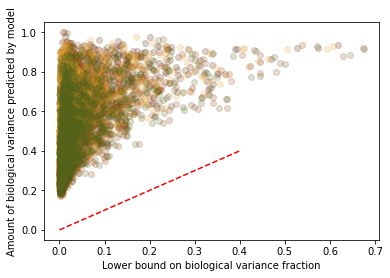

In [159]:
for j in range(4):
    S_d = np.hstack((S_[3*j],S_[3*j+1], S_[3*j+2])).mean(1)
    x = f_modelfree[j]
    y = f_mech_true[j]
    q = np.quantile(S_d,0)
    gf = S_d>q
    plt.scatter(x[gf],y[gf],color=Degas[j],alpha=0.2)
    xl = [0,0.4]
plt.xlabel('Lower bound on biological variance fraction')
plt.ylabel('Amount of biological variance predicted by model')
plt.plot(xl,xl,'r--')


In [170]:
# for j in range(4):
#     S_d = np.hstack((S_[3*j],S_[3*j+1], S_[3*j+2])).mean(1)
#     x = vclus[j]/varg[j]
#     y = f_mech[j*3]
#     q = np.quantile(S_d,0)
#     gf = S_d>q
#     plt.scatter(x[gf],y[gf],color=Degas[j],alpha=0.2)
#     xl = [0,0.4]
# plt.xlabel('Lower bound on biological variance fraction')
# plt.ylabel('Amount of biological variance predicted by model')
# plt.plot(xl,xl,'r--')

In [272]:
f_tech_naive.min()

0.010660444386303425

(0.0, 0.7)

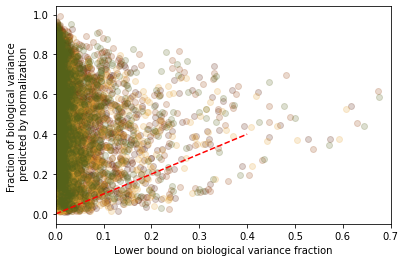

In [278]:
for j in range(4):
    S_d = np.hstack((S_[3*j],S_[3*j+1], S_[3*j+2])).mean(1)
    x = f_modelfree[j]
    y = f_tech_naive[j]
    q = np.quantile(S_d,0)
    gf = S_d>q
    plt.scatter(x[gf],y[gf],color=Degas[j],alpha=0.2)
    xl = [0,0.4]
plt.xlabel('Lower bound on biological variance fraction')
plt.ylabel('Fraction of biological variance \n predicted by normalization')
plt.plot(xl,xl,'r--')
plt.xlim([0,0.7])

(0.0, 0.7)

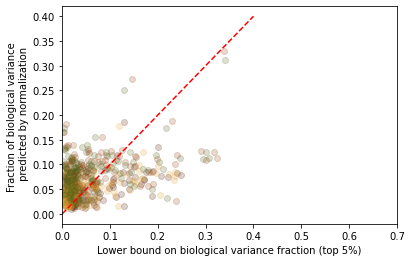

In [279]:
for j in range(4):
    S_d = np.hstack((S_[3*j],S_[3*j+1], S_[3*j+2])).mean(1)
    x = f_modelfree[j]
    y = f_tech_naive[j]
    q = np.quantile(S_d,0.95)
    gf = S_d>q
    plt.scatter(x[gf],y[gf],color=Degas[j],alpha=0.2)
    xl = [0,0.4]
plt.plot(xl,xl,'r--')
plt.xlabel('Lower bound on biological variance fraction (top 5%)')
plt.ylabel('Fraction of biological variance \n predicted by normalization')

plt.xlim([0,0.7])

In [25]:
q

9.854284667968725

In [29]:
# S_d[gf]

Text(0, 0.5, 'Density')

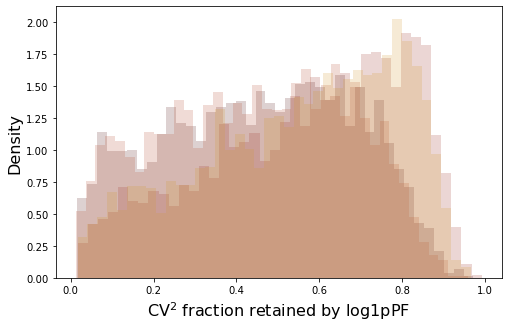

In [215]:
plt.figure(figsize=(8,5))
for j in range(4):
    c = Demuth[j%len(Demuth)]
    plt.hist(f_tech_naive[j],nbin,alpha=0.2,density=True,facecolor=c,label=dataset_names[j])
plt.xlabel(r'CV$^2$ fraction retained by log1pPF',fontsize=fs)
plt.ylabel('Density',fontsize=fs)
# plt.legend()


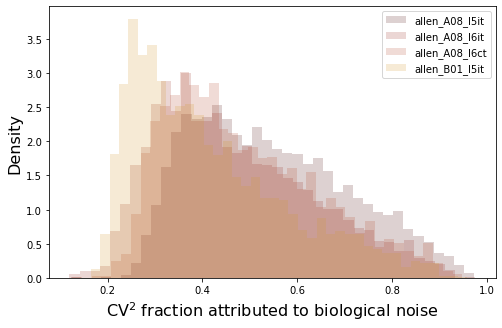

In [216]:
plt.figure(figsize=(8,5))
for j in range(4):
    c = Demuth[j%len(Demuth)]
    plt.hist(f_mech[j],nbin,alpha=0.2,density=True,facecolor=c,label=dataset_names[j])
plt.xlabel(r'CV$^2$ fraction attributed to biological noise',fontsize=fs)
# plt.xlabel(r'CV$^2$ fraction attributed to technical noise',fontsize=fs)
plt.ylabel('Density',fontsize=fs)
plt.legend()


Text(0, 0.5, 'CV$^2$ fraction retained by log1pPF')

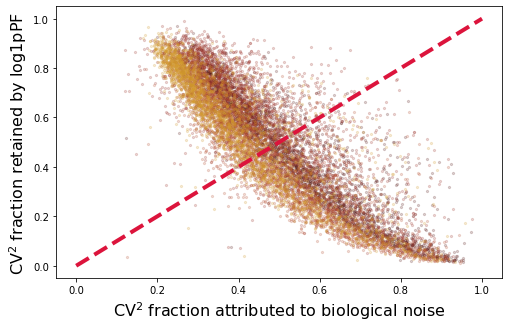

In [219]:
plt.figure(figsize=(8,5))
for j in range(4):
    c = Demuth[j%len(Demuth)]
    plt.scatter(f_mech[j],f_tech_naive[j],s=5,alpha=0.2,c=c)
plt.plot([0,1],[0,1],'--',c='crimson',linewidth=4)
# plt.xlabel(r'CV$^2$ fraction attributed to technical noise',fontsize=fs)
plt.xlabel(r'CV$^2$ fraction attributed to biological noise',fontsize=fs)
plt.ylabel(r'CV$^2$ fraction retained by log1pPF',fontsize=fs)

# fig_string = analysis_dir_string+'/CV2_noise.png'
# plt.savefig(fig_string,dpi=450)
# log.info('Figure stored to {}.'.format(fig_string))


In [23]:
# Svar = []
# for j in range(n_datasets):
#     Svar.append([x['S_var'] for x in sd_arr[j].moments])
# Svar = np.asarray(Svar)

In [24]:
# Smean = []
# for j in range(n_datasets):
#     Smean.append([x['S_mean'] for x in sd_arr[j].moments])
# Smean = np.asarray(Smean)

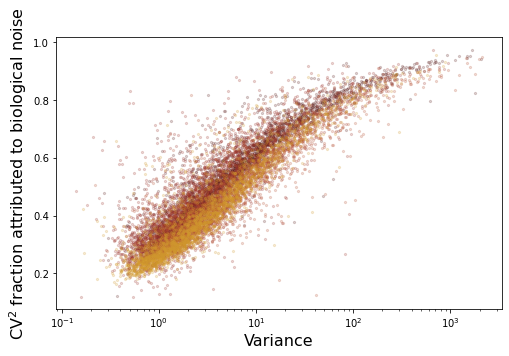

In [223]:
plt.figure(figsize=(8,5))
for j in range(4):
    c = Demuth[j%len(Demuth)]
    plt.scatter(S_var[j],f_mech[j],s=5,alpha=0.2,c=c)
# plt.ylabel(r'CV$^2$ fraction attributed to technical noise',fontsize=fs)
plt.ylabel(r'CV$^2$ fraction attributed to biological noise',fontsize=fs)
plt.xlabel(r'Variance',fontsize=fs)
plt.xscale('log')


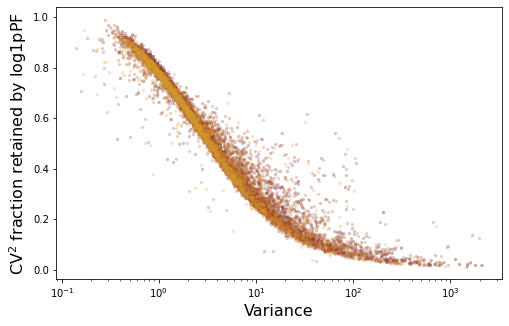

In [225]:
plt.figure(figsize=(8,5))
for j in range(4):
    c = Demuth[j%len(Demuth)]
    plt.scatter(S_var[j],f_tech_naive[j],s=5,alpha=0.2,c=c)
plt.ylabel(r'CV$^2$ fraction retained by log1pPF',fontsize=fs)
plt.xlabel(r'Variance',fontsize=fs)
plt.xscale('log')


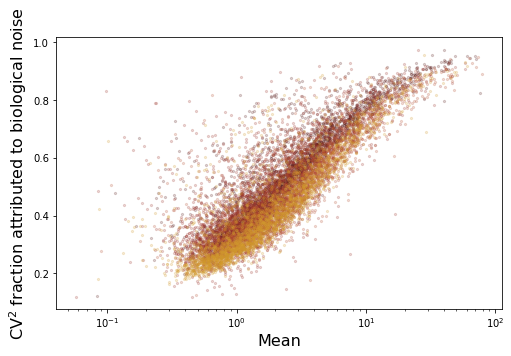

In [227]:
plt.figure(figsize=(8,5))
for j in range(4):
    c = Demuth[j%len(Demuth)]
    plt.scatter(S_mean[j],f_mech[j],s=5,alpha=0.2,c=c)
# plt.ylabel(r'CV$^2$ fraction attributed to technical noise',fontsize=fs)
plt.ylabel(r'CV$^2$ fraction attributed to biological noise',fontsize=fs)
plt.xlabel(r'Mean',fontsize=fs)
plt.xscale('log')

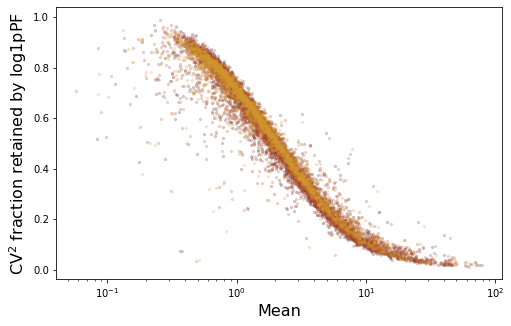

In [229]:
plt.figure(figsize=(8,5))
for j in range(4):
    c = Demuth[j%len(Demuth)]
    plt.scatter(S_mean[j],f_tech_naive[j],s=5,alpha=0.2,c=c)
# plt.plot([0,1],[0,1],'--',c='crimson',linewidth=4)
# plt.ylabel(r'CV$^2$ fraction attributed to technical noise',fontsize=fs)
plt.ylabel(r'CV$^2$ fraction retained by log1pPF',fontsize=fs)
plt.xlabel(r'Mean',fontsize=fs)
plt.xscale('log')

# fig_string = analysis_dir_string+'/CV2_noise.png'
# plt.savefig(fig_string,dpi=450)
# log.info('Figure stored to {}.'.format(fig_string))


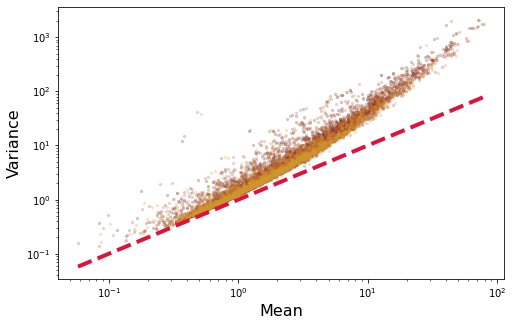

In [230]:
plt.figure(figsize=(8,5))
for j in range(4):
    c = Demuth[j%len(Demuth)]
    plt.scatter(S_mean[j],S_var[j],s=5,alpha=0.2,c=c)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'Variance',fontsize=fs)
plt.xlabel(r'Mean',fontsize=fs)
xl = [S_mean.min(),S_mean.max()]
plt.plot(xl,xl,'--',c='crimson',linewidth=4)


Text(0, 0.5, 'Fano')

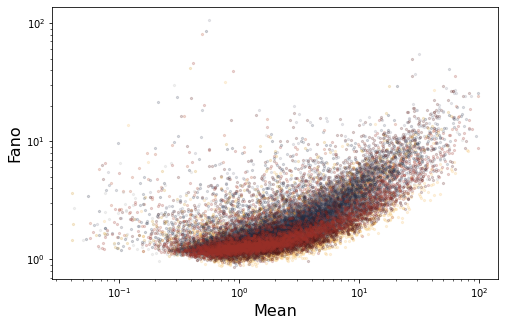

In [30]:
plt.figure(figsize=(8,5))
for j in range(n_datasets):
    c = Demuth[j%len(Demuth)]
    plt.scatter(Smean[j],Svar[j]/Smean[j],s=5,alpha=0.2,c=c)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'Mean',fontsize=fs)
plt.ylabel(r'Fano',fontsize=fs)


(12, 3000)